In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


df = pd.read_excel('/Users/martinwolf/Python/Superdepot Reporting/Data/df.xlsx')
df['Pick Datum'] = pd.to_datetime(df['B']).dt.date


In [89]:
def DatenKundeaufbereiten(dfa):
    # DataFrame Picks zu Kunden
    dfapicks = dfa.groupby(['Lieferschein','Pick Datum','Kunde'],dropna =False)['Picks Gesamt'].sum().reset_index()
    dfapicksinCS = dfa.groupby(['Lieferschein','Pick Datum'])['Picks CS'].sum().reset_index()
    dfapicksinPAL = dfa.groupby(['Lieferschein','Pick Datum'])['Picks PAL'].sum().reset_index()
    dfapicksinOUT = dfa.groupby(['Lieferschein','Pick Datum'])['Picks OUT'].sum().reset_index()
    dfakunden = pd.merge(dfapicks, dfapicksinCS[['Lieferschein','Picks CS']],left_on='Lieferschein', right_on='Lieferschein',how='left')
    dfakunden = pd.merge(dfakunden, dfapicksinOUT[['Lieferschein','Picks OUT']],left_on='Lieferschein', right_on='Lieferschein',how='left')
    dfakunden = pd.merge(dfakunden, dfapicksinPAL[['Lieferschein','Picks PAL']],left_on='Lieferschein', right_on='Lieferschein',how='left')
    # DataFrame Picks zu Tag
    return dfakunden
def DatenPickTagaufbereiten(dfT):
    dfaPicksTag = dfT.groupby(['Pick Datum'])['Picks Gesamt'].sum().reset_index()
    dfaCStag = dfT.groupby(['Pick Datum'])['Picks CS'].sum().reset_index()   
    dfaPALtag = dfT.groupby(['Pick Datum'])['Picks PAL'].sum().reset_index()      
    dfaOUTtag = dfT.groupby(['Pick Datum'])['Picks OUT'].sum().reset_index()
    dfaZugriffe = pd.merge(dfaPicksTag, dfaCStag[['Pick Datum','Picks CS']],left_on='Pick Datum', right_on='Pick Datum',how='left')         
    dfaZugriffe = pd.merge(dfaZugriffe, dfaOUTtag[['Pick Datum','Picks OUT']],left_on='Pick Datum', right_on='Pick Datum',how='left')
    dfaZugriffe = pd.merge(dfaZugriffe, dfaPALtag[['Pick Datum','Picks PAL']],left_on='Pick Datum', right_on='Pick Datum',how='left')
    return dfaZugriffe

In [90]:
dfPicks = DatenPickTagaufbereiten(df)

df = dfPicks[['Pick Datum','Picks Gesamt']]
df.index = df['Pick Datum']
del df['Pick Datum']
test_days = 20

bitcoin = df.filter(['Picks Gesamt'])

In [91]:
bitcoin_data = bitcoin.values
bitcoin_data

array([[1344.        ],
       [1002.        ],
       [1056.        ],
       [1085.        ],
       [ 650.        ],
       [1084.        ],
       [1310.        ],
       [1342.        ],
       [ 805.        ],
       [1147.        ],
       [ 865.        ],
       [1256.        ],
       [ 852.        ],
       [1060.        ],
       [ 730.        ],
       [1053.        ],
       [ 617.        ],
       [ 738.875     ],
       [2259.87681159],
       [1859.66666667],
       [1753.        ],
       [1273.        ],
       [1274.        ],
       [2467.5       ],
       [2057.15      ],
       [1162.        ],
       [1400.        ],
       [1611.        ],
       [2262.        ],
       [2026.        ],
       [1870.        ],
       [1434.        ],
       [1940.        ],
       [2798.91666667],
       [2005.12      ],
       [1661.64      ],
       [1114.4       ],
       [1860.2       ],
       [2594.12      ],
       [2181.        ],
       [1192.        ],
       [2866.   

In [92]:
import math


training_len = math.ceil(len(bitcoin) * 0.8)


In [93]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(bitcoin_data)
train_data = scaled_data[:training_len]
train_data.shape


(117, 1)

In [94]:
x_train = []
y_train = []

for i in range (test_days, len(train_data)):
    x_train.append(train_data[i- test_days:i])
    y_train.append(train_data[i])

x_train

[array([[0.35436242],
        [0.23959732],
        [0.25771812],
        [0.26744966],
        [0.12147651],
        [0.26711409],
        [0.34295302],
        [0.35369128],
        [0.17348993],
        [0.28825503],
        [0.19362416],
        [0.32483221],
        [0.18926174],
        [0.2590604 ],
        [0.14832215],
        [0.25671141],
        [0.11040268],
        [0.15130034],
        [0.66170363],
        [0.52740492]]),
 array([[0.23959732],
        [0.25771812],
        [0.26744966],
        [0.12147651],
        [0.26711409],
        [0.34295302],
        [0.35369128],
        [0.17348993],
        [0.28825503],
        [0.19362416],
        [0.32483221],
        [0.18926174],
        [0.2590604 ],
        [0.14832215],
        [0.25671141],
        [0.11040268],
        [0.15130034],
        [0.66170363],
        [0.52740492],
        [0.49161074]]),
 array([[0.25771812],
        [0.26744966],
        [0.12147651],
        [0.26711409],
        [0.34295302],
      

In [95]:
y_train

[array([0.49161074]),
 array([0.33053691]),
 array([0.33087248]),
 array([0.73137584]),
 array([0.5936745]),
 array([0.29328859]),
 array([0.37315436]),
 array([0.44395973]),
 array([0.66241611]),
 array([0.58322148]),
 array([0.53087248]),
 array([0.38456376]),
 array([0.55436242]),
 array([0.84258949]),
 array([0.57621477]),
 array([0.46095302]),
 array([0.27731544]),
 array([0.52758389]),
 array([0.77386577]),
 array([0.6352349]),
 array([0.3033557]),
 array([0.86510067]),
 array([0.6352349]),
 array([0.61812081]),
 array([0.62315436]),
 array([0.3033557]),
 array([0.71812081]),
 array([0.65872483]),
 array([0.47181208]),
 array([0.30268456]),
 array([0.5885906]),
 array([0.39026846]),
 array([0.49986577]),
 array([0.30100671]),
 array([0.47751678]),
 array([0.49932886]),
 array([0.49865772]),
 array([0.5704698]),
 array([0.23557047]),
 array([0.43154362]),
 array([0.70707616]),
 array([0.50469799]),
 array([0.47751678]),
 array([0.44395973]),
 array([0.37114094]),
 array([0.6211409

In [96]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(97, 20, 1)

In [98]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
# die Epochen legen die Durchläufe fest
model.fit(x_train, y_train, batch_size=1, epochs=1000)



Epoch 1/1000
97/97 [==============================] - 2s 3ms/step - loss: 0.0416
Epoch 2/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 3/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 4/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 5/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 6/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 7/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 8/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 9/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0276
Epoch 10/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 11/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 12/1000
97/97 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 13/1000
97/97 [====

In [99]:
test_data = scaled_data[training_len - test_days: , :]
x_test = []
y_test = bitcoin_data[training_len:, :]

In [100]:
for i in range (test_days, len(test_data)):
    x_test.append(test_data[i- test_days:i])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [101]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 386ms/step


In [102]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

124.74411300383571

In [103]:
train = bitcoin[:training_len]
valid = bitcoin[training_len:]
valid['Predictions'] = predictions

/var/folders/0j/czkb_cmx12d_xchj2bf8bptc0000gn/T/ipykernel_4105/60196817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


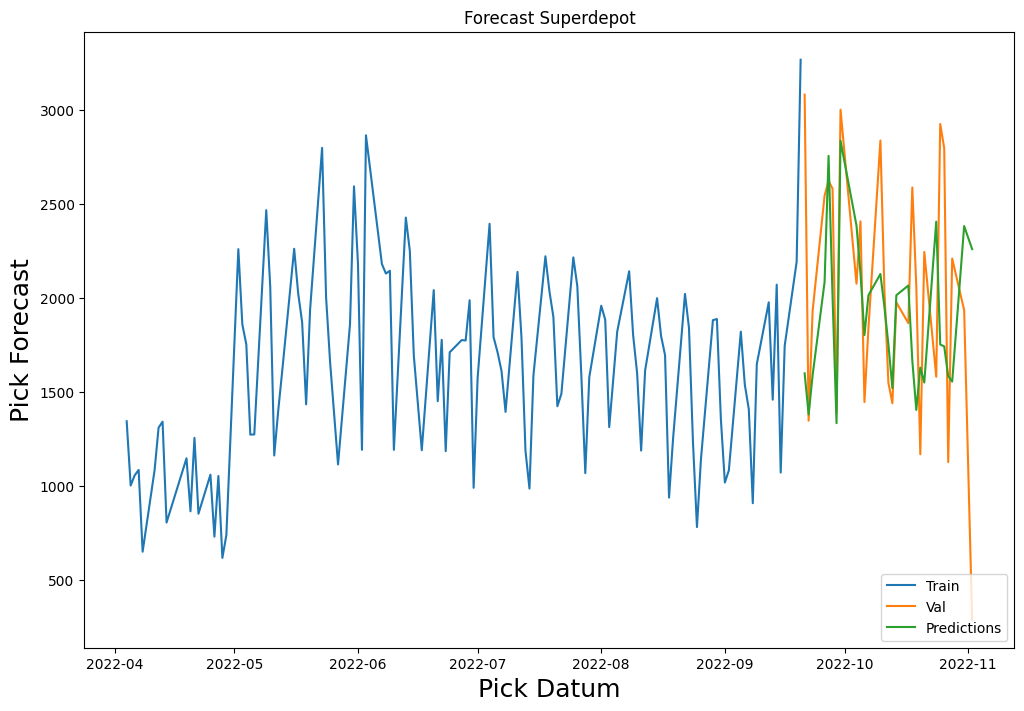

In [111]:
plt.figure(figsize=(12,8))
plt.title('Forecast Superdepot')
plt.xlabel('Pick Datum', fontsize=18)
plt.ylabel('Pick Forecast', fontsize=18)
plt.plot(train['Picks Gesamt'])
plt.plot(valid[['Picks Gesamt', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [112]:
valid

,Picks Gesamt,Predictions
Pick Datum,,
2022-09-21,3082.166667,1599.207642
2022-09-22,1347.000000,1380.223633
2022-09-23,1931.000000,1588.978760
2022-09-26,2544.000000,2084.568359
2022-09-27,2623.000000,2756.360596
2022-09-28,2582.000000,2006.493774
2022-09-29,1388.000000,1333.994507
2022-09-30,3002.000000,2836.315918
2022-10-04,2076.119048,2386.009033
